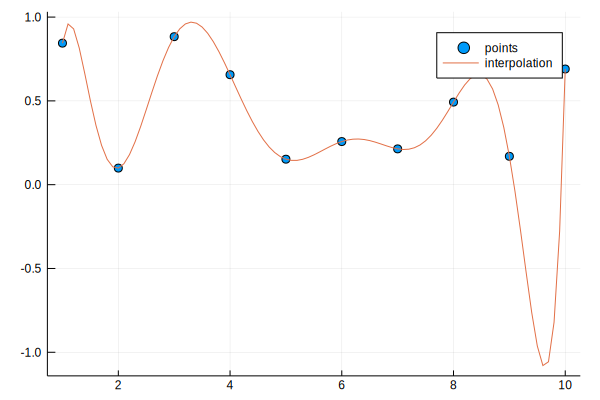

In [89]:
#ZADANIE 1 - interpolacja Lagrange

using Plots
xs =  1:1:10
n = length(xs)
ys = [rand() for x in xs]
    


function interpolate_lagrange(xs, ys, x)
    val = 0
    for i in 1:1:n
        tmp = ys[i]
        for j in 1:1:n
            if i != j
                tmp *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        val += tmp
    end
    return val
end

xs2 = 1:0.1:10
ys2 = [interpolate_lagrange(xs,ys,x) for x in xs2]

scatter(xs, ys, label="points")
plot!(xs2, ys2, label="interpolation")


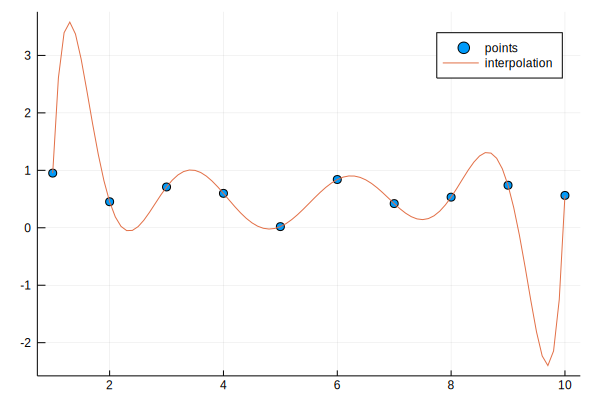

In [90]:
#ZADANIE 2 - interpolacja Netwona

using Plots
xs =  1:1:10
n = length(xs)
ys = [rand() for x in xs]

array = zeros(n,n)

for i in 1:1:n
    array[i,1] = ys[i] 
end
for j in 2:1:n
    for i in j:1:n
        array[i,j] = (array[i,j-1] - array[i-1,j-1]) / (xs[i] - xs[i-j+1])
    end
end

a = zeros(n)
for i in 1:1:n
    a[i] = array[i,i]
end
function newton(xs, A, x)
    val = A[1]
    for i in 2:1:length(A)
        tmp = A[i]
        for j in 1:1:i-1
            tmp *= (x-xs[j])
        end
        val += tmp
    end
    return val
end

xs2 = 1:0.1:10
ys2 = [newton(xs,a,x) for x in xs2]

scatter(xs, ys, label="points")
plot!(xs2, ys2, label="interpolation")

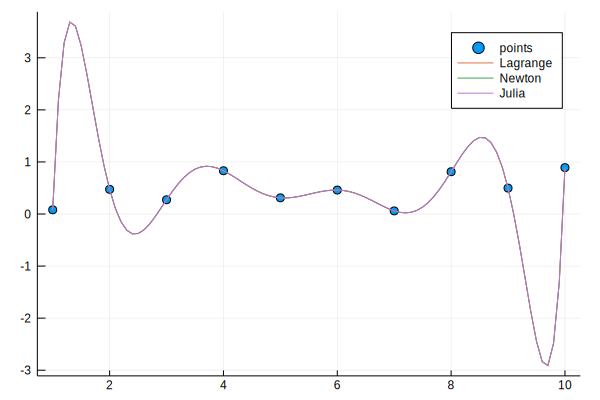

In [91]:
#ZADANIE 3 - porównanie interpolacji


using Plots
using Pkg
using Polynomials
xs =  1:1:10
n = length(xs)
ys = [rand() for x in xs]

function lagrange(xs, ys, x)
    val = 0
    for i in 1:1:n
        tmp = ys[i]
        for j in 1:1:n
            if i != j
                tmp *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        val += tmp
    end
    return val
end



function init_newton(xs, ys)
    n = length(xs)
    array = zeros(n,n)
    for i in 1:1:n
        array[i,1] = ys[i] 
    end
    for j in 2:1:n
        for i in j:1:n
            array[i,j] = (array[i,j-1] - array[i-1,j-1]) / (xs[i] - xs[i-j+1])
        end
    end

    a = zeros(n)
    for i in 1:1:n
        a[i] = array[i,i]
    end
    return a
end

function newton(A, xs, x)
    val = A[1]
    for i in 2:1:length(A)
        tmp = A[i]
        for j in 1:1:i-1
            tmp *= (x-xs[j])
        end
        val += tmp
    end
    return val
end

# LAGRANGE
xs2 = 1:0.1:10
ys2 = [lagrange(xs,ys,x) for x in xs2]

# NEWTON
A = init_newton(xs,ys)
xs3 = 1:0.1:10
ys3 = [newton(A,xs,x) for x in xs3]

# JULIA
xs4 = 1:0.1:10
fit=polyfit(xs, ys, length(xs)-1)

scatter(xs, ys, label="points")
plot!(xs2, ys2, label="Lagrange")
plot!(xs3, ys3, label="Newton")
plot!(xs4,polyval(fit, xs4), label="Julia")


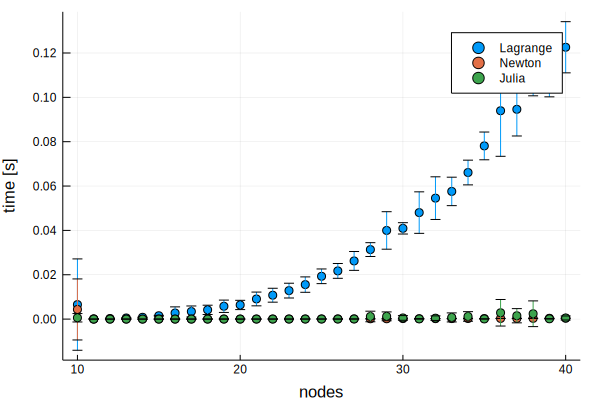

In [92]:
#ZADANIE 4 - porównanie czasów interpolacji

using Plots
using DataFrames
using Statistics
range = 10:40
lagrange_result = []
newton_result = []
julia_result = []
nodes = []

function calculate_newton(xs, ys, xs2)
    A = init_newton(xs,ys)
    ys4 = [newton(A,xs,x) for x in xs2]
    return ys4
end
function calculate_polyfit(xs, ys, xs2)
    fit=polyfit(xs, ys, length(xs)-1)
    ys4 = polyval(fit, xs2)
    return ys4
end

for i in range
    xs =  10:1:i

    ys = [rand() for x in xs]
    n = length(xs)
    for j in 1:10
        push!(nodes, i)
        xs2 = 1:0.1:i

        # LAGRANGE
        push!(lagrange_result, @elapsed [lagrange(xs,ys,x) for x in xs2])

        # NEWTON
        push!(newton_result, @elapsed calculate_newton(xs, ys, xs2))

        # JULIA
        push!(julia_result, @elapsed calculate_polyfit(xs,ys,xs2))
    end
end

df=DataFrame()
df[:nodes]=nodes
df[:lagrange_result] = lagrange_result
df[:newton_result]=newton_result
df[:julia_result]=julia_result

df2=by(df, :nodes,  df->DataFrame(
        average_lagrange=mean(df[:lagrange_result]),
        std_lagrange=std(df[:lagrange_result]),
        average_newton=mean(df[:newton_result]),
        std_newton=std(df[:newton_result]),
        average_julia=mean(df[:julia_result]),
        std_julia=std(df[:julia_result]),
        ))

scatter(df2[:nodes],
    [df2[:average_lagrange] df2[:average_newton] df2[:average_julia]],
    labels = ["Lagrange" "Newton" "Julia"],
    yerr = [df2[:std_lagrange] df2[:std_newton] df2[:std_julia]])
xlabel!("nodes")
ylabel!("time [s]")

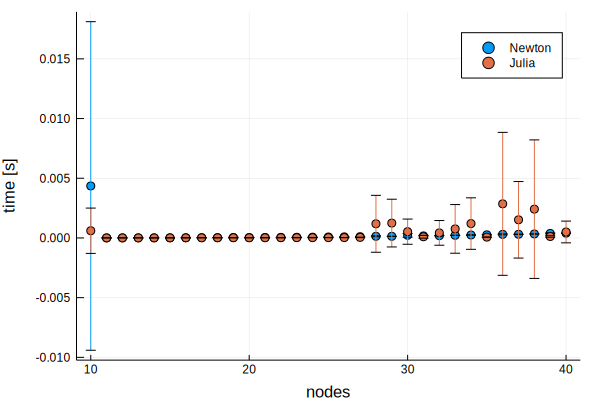

In [93]:
#ZADANIE 4 - porównanie czasów interpolacji (bez Lagrange)


scatter(df2[:nodes],
    [df2[:average_newton] df2[:average_julia]],
    labels = ["Newton" "Julia"],
    yerr = [df2[:std_newton] df2[:std_julia]])
xlabel!("nodes")
ylabel!("time [s]")

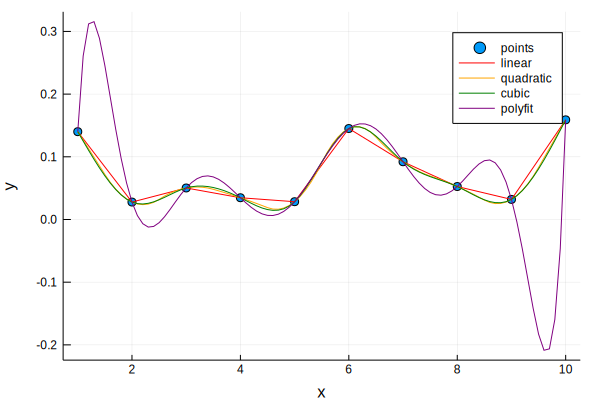

In [94]:
#ZADANIE 5 - spline


using Interpolations
using Plots

xs =  1:1:10
n = length(xs)
ys = [rand()/5 for x in xs]

xs2 = 1:0.1:10

linear = LinearInterpolation(xs, ys)
linear_ys = [linear(x) for x in xs2]

quadratic = interpolate(ys, BSpline(Quadratic(Line(OnCell()))))
quadratic_ys = [quadratic(x) for x in xs2]

cubic = CubicSplineInterpolation(xs, ys)
cubic_ys = [cubic(x) for x in xs2]

fit=polyfit(xs, ys, length(xs)-1)
polyfit_ys = polyval(fit, xs2)

scatter(xs, ys, label="points")
plot!(xs2, linear_ys, label="linear", color="red")
plot!(xs2, quadratic_ys, label="quadratic", color="orange")
plot!(xs2, cubic_ys, label="cubic", color="green")
plot!(xs2, polyfit_ys, label="polyfit", color="purple")
xlabel!("x")
ylabel!("y")


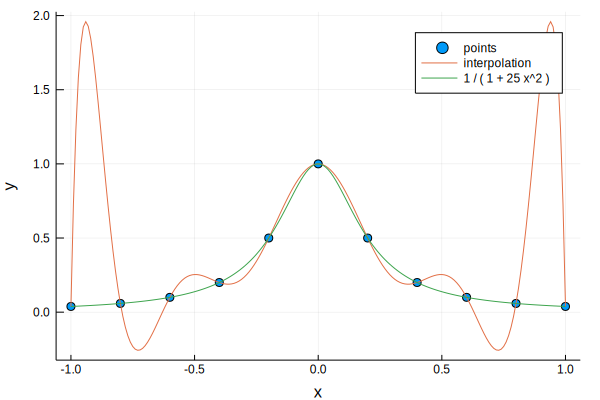

In [95]:
#ZADANIE 6 - efekt Rungego

#Funkcja rungego - 1 / ( 1 + 25 x^2 )
xs = -1:0.2:1
n = length(xs)
ys = [1/(1+25*x^2) for x in xs]


xs2 = -1:0.01:1
lagrange_ys = [interpolate_lagrange(xs,ys,x) for x in xs2]
real_ys = [1/(1+25*x^2) for x in xs2]

scatter(xs, ys, label="points")
plot!(xs2, lagrange_ys, label="interpolation")
plot!(xs2, real_ys, label="1 / ( 1 + 25 x^2 )")
xlabel!("x")
ylabel!("y")

"Orginal image"

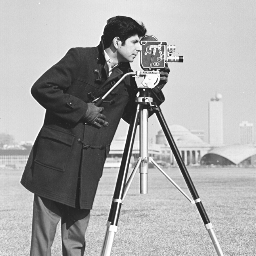

"Nearest intepolation"

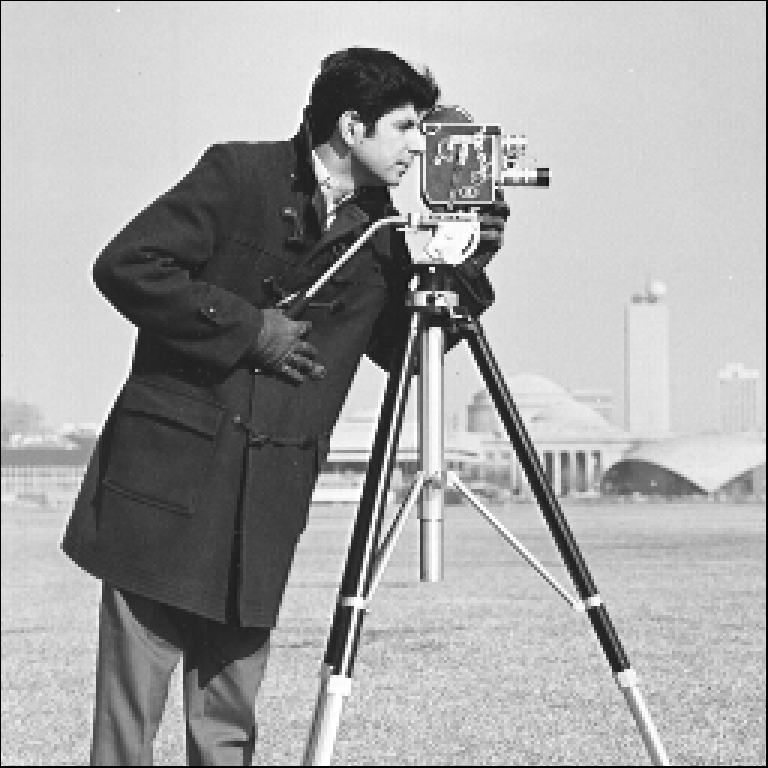

"Bilinear intepolation"

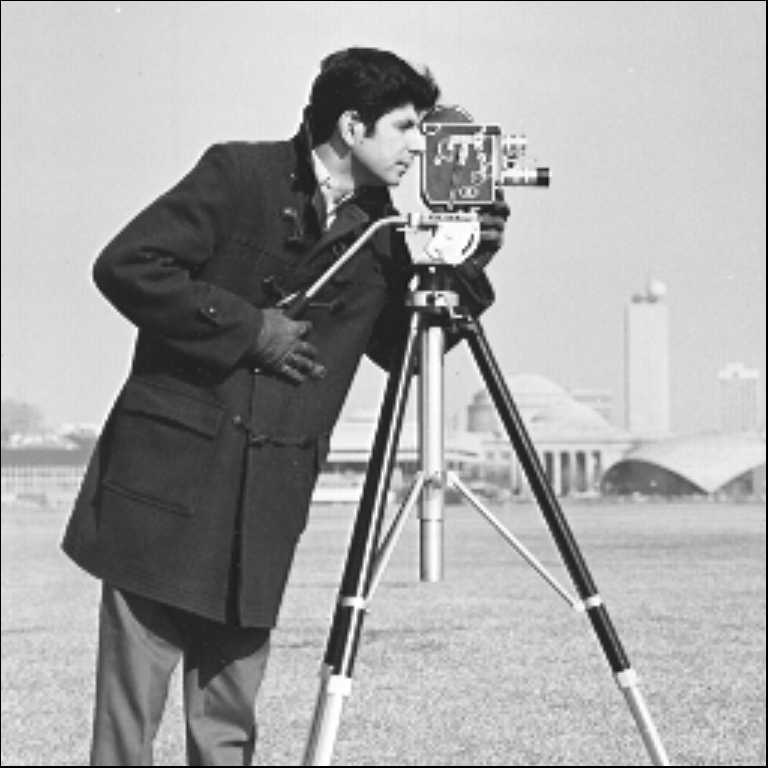

"Bicubic intepolation"

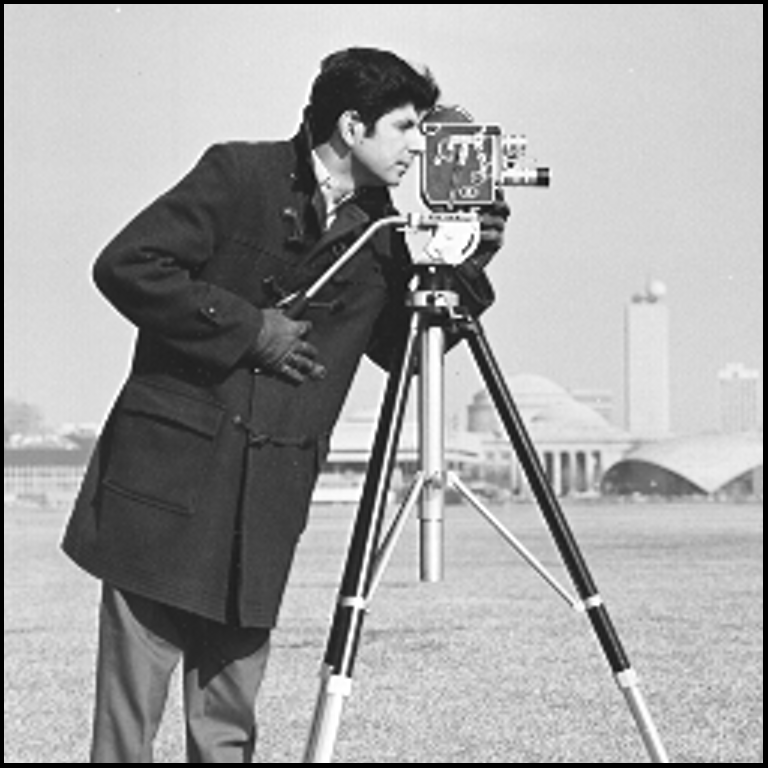

In [97]:
#ZADANIE 7 - interpolacja bilinear, bicubic do powiększania zdjęć

using ColorSchemes, Images, FileIO, Plots

function lagrange(xs, ys, x)
    val = 0
    n = length(xs)
    for i in 1:1:n
        tmp = ys[i]
        for j in 1:1:n
            if i != j
                tmp *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        val += tmp
    end
    return val
end

image = Images.load("cameraman.bmp")
image=convert(Array{RGB{Float64}}, image)

old_height = size(image)[1]
old_width = size(image)[2]
new_height = 768
new_width = 768

new_image_nearest = zeros(RGB{Float32}, new_height, new_width)
new_image_bilinear = zeros(RGB{Float32}, new_height, new_width)
new_image_bicubic = zeros(RGB{Float32}, new_height, new_width)

#arguments - array of values
# t - top, l - left, r - right, b - bottom
# xperc - distance from "l"
# yperc - distance from "t"
function nearest(tl, tr, bl, br, xperc, yperc)
    if(xperc >= 0.5 && yperc >= 0.5)
        return br
    end
    if(xperc >= 0.5 && yperc < 0.5)
        return tr
    end
    if(xperc < 0.5 && yperc >= 0.5)
        return bl
    end
    if(xperc < 0.5 && yperc < 0.5)
        return tl
    end
    return 0
end

#arguments - array of values
# t - top, l - left, r - right, b - bottom
# xperc - distance from "l"
# yperc - distance from "t"
function bilinear(tl, tr, bl, br, xperc, yperc)
    #yt_col = tl + xperc * (tr-tl)
    #yb_col = bl + xperc * (br-bl)
    #val = yt_col + yperc * (yb_col - yt_col)
    xs = 0:1
    ys = 0:1
    
    yt_col = lagrange(xs, [tl, tr],xperc)
    yb_col = lagrange(xs, [bl, br],xperc)
    val = lagrange(ys, [yt_col, yb_col],yperc)

    return val
end

#arguments - array of values
# t - top, l - left, r - right, b - bottom
# xperc - distance from "l"
# yperc - distance from "t"
function bicubic(ttll, ttl, ttr, ttrr,
                    tll, tl, tr, trr,
                    bll, bl, br, brr,
                    bbll, bbl, bbr, bbrr,
                    xperc, yperc)
    xs = -1:2
    ys = -1:2
    
    ytt_col = lagrange(xs, [ttll, ttl, ttr, ttrr],xperc)
    yt_col = lagrange(xs, [tll, tl, tr, trr],xperc)
    yb_col = lagrange(xs, [bll, bl, br, brr],xperc)
    ybb_col = lagrange(xs, [bbll, bbl, bbr, bbrr],xperc)

    val = lagrange(ys, [ytt_col, yt_col, yb_col, ybb_col],yperc)
    return val
end

                
for y=1:new_height
    for x=1:new_width
        x_center = x - 0.5
        y_center = y - 0.5
        in_old_coords_x = x_center * (old_width / new_width)
        in_old_coords_y = y_center * (old_height / new_height)
        
        nearest_left_x = trunc(Int, floor((in_old_coords_x)-0.5)) #indexed from 0
        nearest_top_y = trunc(Int, floor((in_old_coords_y)-0.5)) #indexed from 0
        
        nearest_left_dot_x = nearest_left_x+0.5
        nearest_top_dot_y = nearest_top_y+0.5
        
        percentage_from_left_x = in_old_coords_x-nearest_left_dot_x
        percentage_from_top_y = in_old_coords_y-nearest_top_dot_y

        nearest_left_x_index = nearest_left_x+1 #indexed from 1
        nearest_top_y_index = nearest_top_y+1 #indexed from 1
        
        nearest_right_x_index = nearest_left_x_index+1
        nearest_bottom_y_index = nearest_top_y_index+1
        
        xperc = percentage_from_left_x
        yperc = percentage_from_top_y
        

        xl = nearest_left_x_index
        xr = nearest_right_x_index
        yt = nearest_top_y_index
        yb = nearest_bottom_y_index
        
        xll = xl -1
        xrr = xr + 1
        ytt = yt - 1
        ybb = yb + 1
        
        #spaghetti alert
        if(xl > 0 && xr <= old_width && yt > 0 && yb <= old_height)
            r = bilinear(image[yt,xl].r, image[yt,xr].r, image[yb,xl].r, image[yb,xr].r, xperc, yperc)    
            g = bilinear(image[yt,xl].g, image[yt,xr].g, image[yb,xl].g, image[yb,xr].g, xperc, yperc)    
            b = bilinear(image[yt,xl].b, image[yt,xr].b, image[yb,xl].b, image[yb,xr].b, xperc, yperc)    
            new_image_bilinear[y,x] = RGB(r,g,b)
        end
        if(xll > 0 && xrr <= old_width && ytt > 0 && ybb <= old_height)
            r = bicubic(image[ytt,xll].r, image[ytt,xl].r, image[ytt,xr].r, image[ytt,xrr].r,
                        image[yt,xll].r, image[yt,xl].r, image[yt,xr].r, image[yt,xrr].r,
                        image[yb,xll].r, image[yb,xl].r, image[yb,xr].r, image[yb,xrr].r,
                        image[ybb,xll].r, image[ybb,xl].r, image[ybb,xr].r, image[ybb,xrr].r,
                        xperc, yperc)   
                            
            g = bicubic(image[ytt,xll].g, image[ytt,xl].g, image[ytt,xr].g, image[ytt,xrr].g,
                        image[yt,xll].g, image[yt,xl].g, image[yt,xr].g, image[yt,xrr].g,
                        image[yb,xll].g, image[yb,xl].g, image[yb,xr].g, image[yb,xrr].g,
                        image[ybb,xll].g, image[ybb,xl].g, image[ybb,xr].g, image[ybb,xrr].g,
                        xperc, yperc)  
            b = bicubic(image[ytt,xll].b, image[ytt,xl].b, image[ytt,xr].b, image[ytt,xrr].b,
                        image[yt,xll].b, image[yt,xl].b, image[yt,xr].b, image[yt,xrr].b,
                        image[yb,xll].b, image[yb,xl].b, image[yb,xr].b, image[yb,xrr].b,
                        image[ybb,xll].b, image[ybb,xl].b, image[ybb,xr].b, image[ybb,xrr].b,
                        xperc, yperc)  
            new_image_bicubic[y,x] = RGB(r,g,b)
        end
        if(xl > 0 && xr <= old_width && yt > 0 && yb <= old_height)
            r = nearest(image[yt,xl].r, image[yt,xr].r, image[yb,xl].r, image[yb,xr].r, xperc, yperc)    
            g = nearest(image[yt,xl].g, image[yt,xr].g, image[yb,xl].g, image[yb,xr].g, xperc, yperc)    
            b = nearest(image[yt,xl].b, image[yt,xr].b, image[yb,xl].b, image[yb,xr].b, xperc, yperc)    
            new_image_nearest[y,x] = RGB(r,g,b)
        end
    end
end
display("Orginal image")
display(image)
display("Nearest intepolation")
display(new_image_nearest)
display("Bilinear intepolation")
display(new_image_bilinear)
display("Bicubic intepolation")
display(new_image_bicubic)